In [49]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [50]:
data = pd.read_csv("loan.csv")

In [51]:
data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [52]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [54]:
#filling categorical data 
data['Gender'].mode()[0]

'Male'

In [55]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)

In [56]:
for i in data.select_dtypes(include='object').columns: 
    data[i].fillna(data[i].mode()[0],inplace=True)

In [57]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [58]:
#filling numerical data 
from sklearn.impute import SimpleImputer

In [59]:
data.select_dtypes(include='float64').columns

Index(['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History'],
      dtype='object')

In [60]:
si = SimpleImputer() 
ar = si.fit_transform(data[['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History']])

In [61]:
data1 = pd.DataFrame(ar,columns = data.select_dtypes(include='float64').columns)

In [62]:
data1.isnull().sum()

CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

# outlier

In [63]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


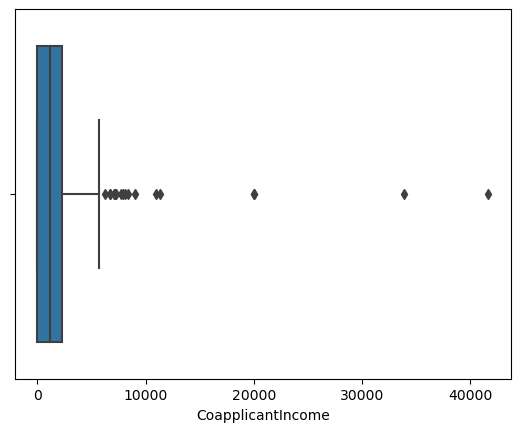

In [64]:
sns.boxplot(x="CoapplicantIncome",data=data) 
plt.show()

# removing outlier

In [65]:
q1 = data['CoapplicantIncome'].quantile(0.25) 
q3 = data['CoapplicantIncome'].quantile(0.75)

In [66]:
IQR = q3 - q1

In [67]:
min_range = q1 - (1.5*IQR) 
max_range = q3 + (1.5*IQR) 
min_range,max_range

(-3445.875, 5743.125)

In [68]:
data = data[data['CoapplicantIncome']<=max_range]

<Axes: xlabel='CoapplicantIncome'>

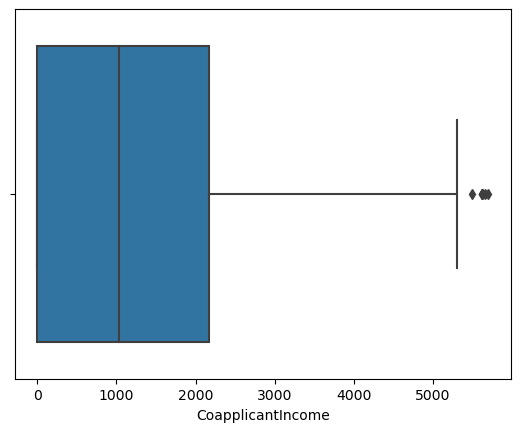

In [69]:
sns.boxplot(x='CoapplicantIncome',data=data)

# scalling

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
ss = StandardScaler() 
ss.fit(data)

ValueError: could not convert string to float: 'LP001002'

In [72]:
data = pd.DataFrame(ss.transform(data))

ValueError: could not convert string to float: 'LP001002'

# principle component analysis

In [73]:
from sklearn.decomposition import PCA

In [74]:
data.shape

(596, 13)

In [75]:
pca = PCA(n_components=2) 
pca.fit(all_data)

ValueError: could not convert string to float: 'LP001002'

In [76]:
pca1 = pd.DataFrame(pca.transform(data))

ValueError: could not convert string to float: 'LP001002'

In [77]:
pca1.shape

NameError: name 'pca1' is not defined